# Caroline Barte
## DSC 680
## Project 3

## Imports

To start, I'm importing  the necessary libraries for my project. This includes pandas, matplotlib, seaborn, and wordcloud. I used these libraries for my visualizations. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

Next, I;m loading my dataset.

In [5]:
df = pd.read_csv("amazon_reviews.csv")

## Basic Analysis

Now, I am creating a function which rates all of the ratings as 'positive','negative', or 'neutral'. Since ratings are already predefined by the customer, I want to do my sentiment analysis another way (probably with the text review itself), but to create my simple visualizations I am using this method. I want to change it for my final project. 

In [6]:
def label_sentiment(rating):
    if rating <= 2:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

Next, I'm making a new column (labeled 'Sentiment') in my dataset, and I'm applying the function.

In [7]:
df["Sentiment"] = df["overall"].apply(label_sentiment)

## Visualizations

The first visual I wanted to create shows the distribution of sentiments.

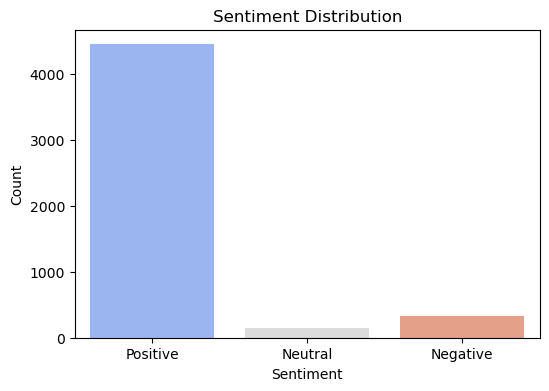

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Sentiment", palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

Next, I wanted to look into the length of reviews. 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


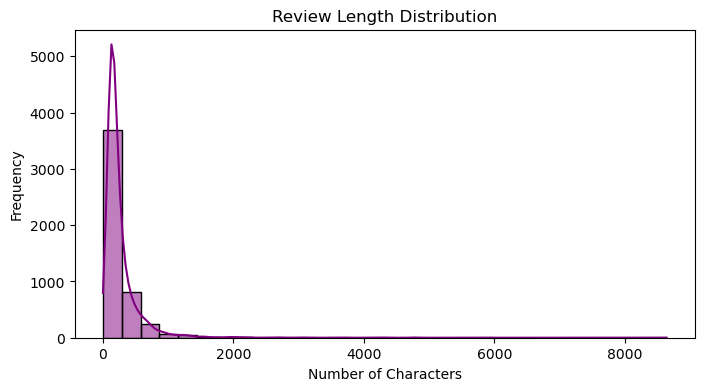

In [9]:
df["review_length"] = df["reviewText"].astype(str).apply(len)
plt.figure(figsize=(8, 4))
sns.histplot(df["review_length"], bins=30, kde=True, color="purple")
plt.title("Review Length Distribution")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

This shows that most reviews aren't very long. So, I am wondering if I should use both the 'star' sentiment as well as the text review. 

After the first visual where most reviews are positive, I wanted to look into the text reviews to see if any words stood out. I am doing this with a word cloud.  

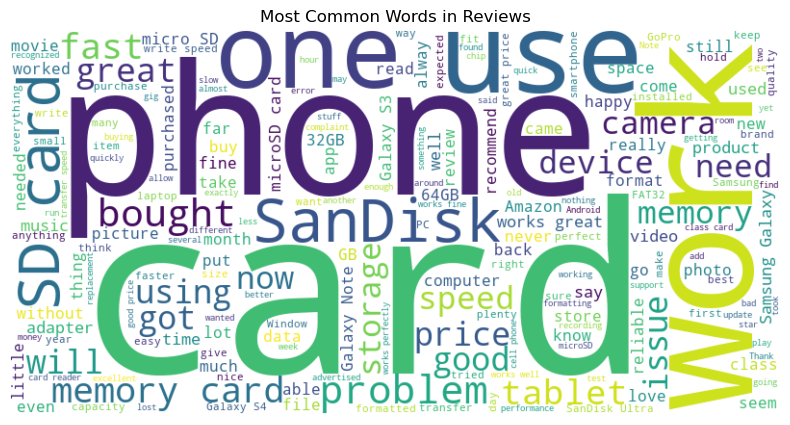

In [10]:
text = " ".join(df["reviewText"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Reviews")
plt.show()

Nothing really stands out as being a directly 'positive' or 'negative' word here, but this does show that most reviews are most likely for tech-related items.

Lastly, I wanted to analyze the relationship between the 'helpful' count and what the user rated the product.

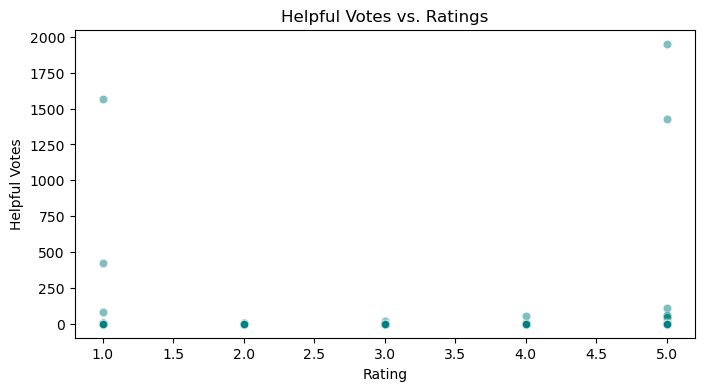

In [12]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x="overall", y="helpful_yes", alpha=0.5, color='teal')
plt.title("Helpful Votes vs. Ratings")
plt.xlabel("Rating")
plt.ylabel("Helpful Votes")
plt.show()

This is how I expected it to be. For example, the super high and super low reviews were deemed the most helpful, as they most help 'influence' the user to purchase the product.